### EDA CSV 2017PurchasePricesDec

In [27]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Cargar el dataset
df_2017PPD = pd.read_csv("DataSet/2017PurchasePricesDec.csv")
df_2017PPD.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


##### Prueba que el dataset cargado tiene la cantidad de registros y columnas especificadas

In [3]:
# Check the shape of the dataset
num_records, num_columns = df_2017PPD.shape

print(f"The dataset has {num_records} records and {num_columns} columns.")

The dataset has 12261 records and 9 columns.


In [4]:
# Resumen general de la información
df_2017PPD.info()

# Estadísticas descriptivas de las variables numéricas
df_2017PPD.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


In [5]:
# Verificación de valores nulos en el dataset
df_2017PPD.isnull().sum()


Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [6]:
# Eliminar filas con valores nulos (1 fila)
df_2017PPD = df_2017PPD.dropna()

#Se procede a eliminar la fila ya que le faltaba información crucial en su mayoría

In [7]:
# Mostrar las primeras filas para revisar el formato de la columna 'Volume'
df_2017PPD['Volume'].head()

# Ver los tipos de datos actuales en la columna
df_2017PPD['Volume'].dtype

# Revisar los valores únicos en la columna 'Volume'
df_2017PPD['Volume'].unique()



array(['750', '1000', '1750', '50', '375', '100', '200', '300', 'Unknown',
       '250', '1500', '3000', '5000', '4000', '187', '150', '500', '720',
       '650', '330', '18000', '180', '6000', '20', '20000', '162.5',
       '400', '1100', '600', '19500', '560', '3750', '9000'], dtype=object)

In [8]:
# Reemplazar 'Unknown' por NaN
df_2017PPD['Volume'] = df_2017PPD['Volume'].replace('Unknown', np.nan)

In [9]:
# Convertir la columna 'Volume' a tipo float
df_2017PPD['Volume'] = pd.to_numeric(df_2017PPD['Volume'], errors='coerce')

In [10]:
# Función para convertir a int si el valor es un decimal sin parte fraccionaria
def convertir_a_entero_si_es_posible(valor):
    if pd.notnull(valor):  # Verificar si no es NaN
        # Convertir a int si el número es decimal pero no tiene parte fraccionaria
        if valor == int(valor):  # Verifica si el número es igual a su valor entero
            return int(valor)  # Convertir a entero
        else:
            return valor  # Mantener como float si tiene decimales reales
    return valor

# Aplicar la función a la columna 'Volume'
df_2017PPD['Volume'] = df_2017PPD['Volume'].apply(convertir_a_entero_si_es_posible)

# Verificar el resultado nuevamente
print(df_2017PPD['Volume'].unique())



[  750.   1000.   1750.     50.    375.    100.    200.    300.      nan
   250.   1500.   3000.   5000.   4000.    187.    150.    500.    720.
   650.    330.  18000.    180.   6000.     20.  20000.    162.5   400.
  1100.    600.  19500.    560.   3750.   9000. ]


In [11]:
# Rellenar valores NaN con cero (0) en de la columna 'Volume'

df_2017PPD['Volume'] = df_2017PPD['Volume'].fillna(0)

df_2017PPD['Volume'].unique()



array([  750. ,  1000. ,  1750. ,    50. ,   375. ,   100. ,   200. ,
         300. ,     0. ,   250. ,  1500. ,  3000. ,  5000. ,  4000. ,
         187. ,   150. ,   500. ,   720. ,   650. ,   330. , 18000. ,
         180. ,  6000. ,    20. , 20000. ,   162.5,   400. ,  1100. ,
         600. , 19500. ,   560. ,  3750. ,  9000. ])

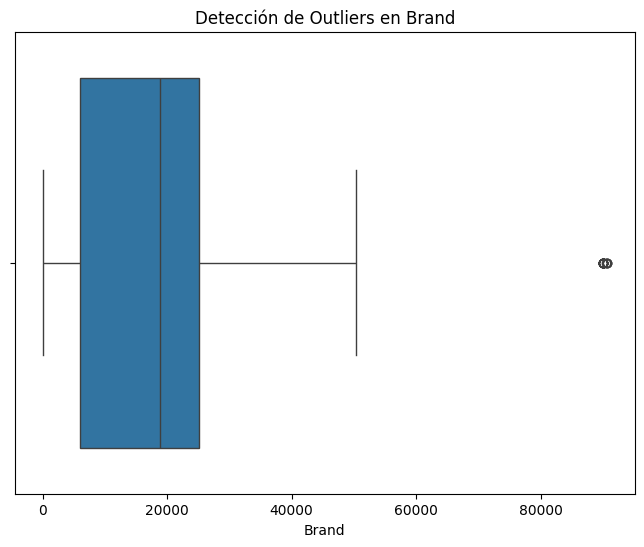

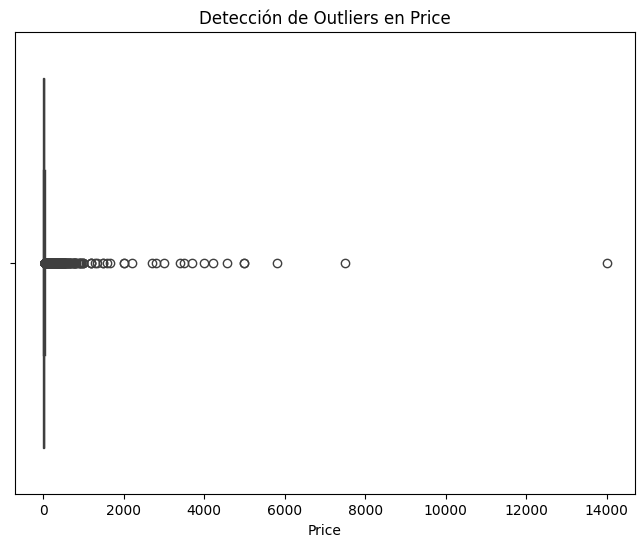

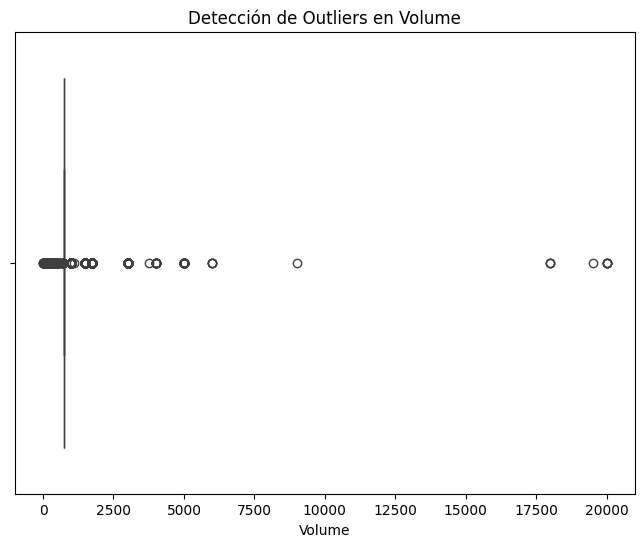

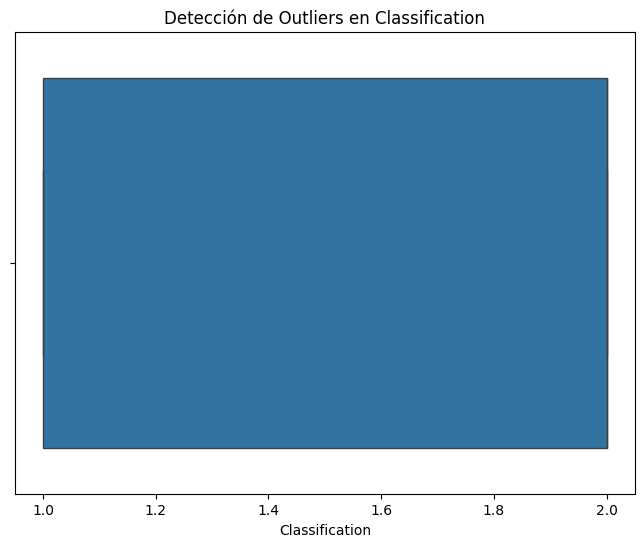

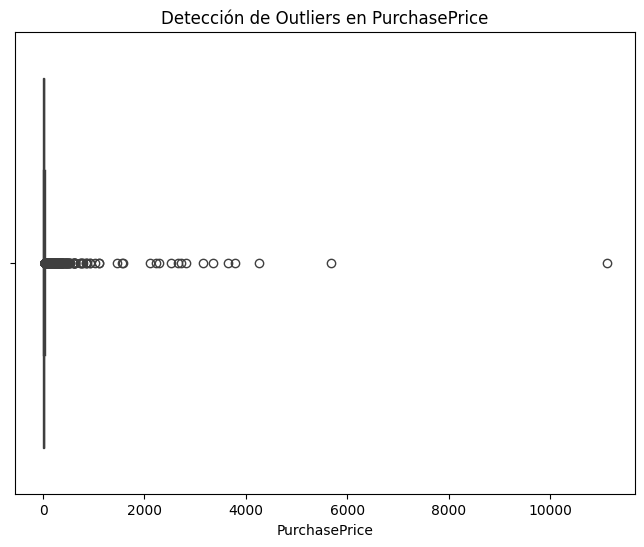

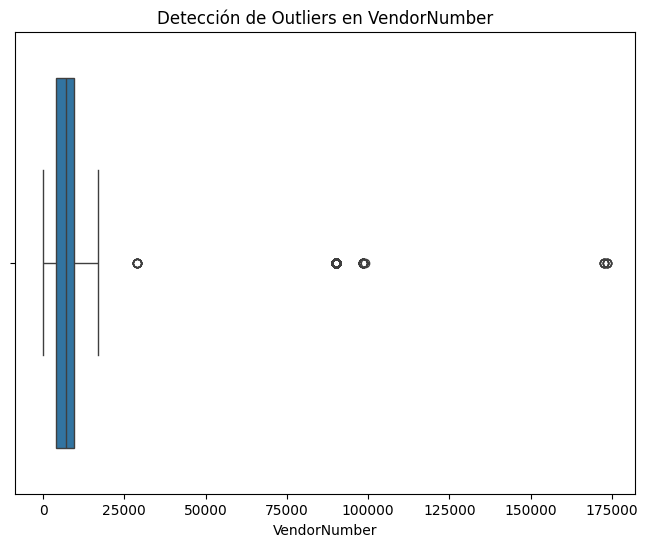

In [12]:
# Detección de outliers columnas (ajusta el nombre de la columna según el dataset)
# Filtrar las columnas numéricas del DataFrame
columnas_numericas = df_2017PPD.select_dtypes(include=['float64', 'int64']).columns

# Iterar sobre las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_2017PPD[columna])
    plt.title(f'Detección de Outliers en {columna}')
    plt.show()

In [13]:
# Función para detectar y mostrar outliers de una columna
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango Intercuartílico

    # Definir los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar las filas que están fuera de los límites (outliers)
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return outliers

In [14]:
# Ver las filas con outliers para una columna específica ('Price')
outliers_price = detectar_outliers(df_2017PPD, 'Price')
print(outliers_price)

       Brand                   Description   Price   Size  Volume  \
18       247   Gran Patron Platinum Tequil  199.99  750mL   750.0   
22       283  Milagro Tequila Reposado SBR   61.99  750mL   750.0   
23       284     Milagro Tequila Anejo SBR   77.99  750mL   750.0   
30       384    Ardbeg Corryvreckan Scotch   74.99  750mL   750.0   
35       425              Hennessy Paradis  799.99  750mL   750.0   
...      ...                           ...     ...    ...     ...   
12237  28005       Somerston Stornoway Red   84.99  750mL   750.0   
12238  28006    Priest Ranch Coach Gun Red   69.99  750mL   750.0   
12251  42655       Warre's Vintage Port 03   67.99  750mL   750.0   
12253  42897            Twomey Merlot Napa   58.99  750mL   750.0   
12258  45016  Neal One Lane Bridg Cab Svgn   93.99  750mL   750.0   

       Classification  PurchasePrice  VendorNumber  \
18                  1         156.24          9165   
22                  1          39.69          3664   
23       

In [15]:
# Ver las filas con outliers para una columna específica ('Volume')
outliers_Volume = detectar_outliers(df_2017PPD, 'Volume')
print(outliers_Volume)

       Brand                  Description  Price    Size  Volume  \
7        115              Belvedere Vodka  27.99  1000mL  1000.0   
8        126             Grey Goose Vodka  32.99  1000mL  1000.0   
10       171               Gentleman Jack  49.99  1750mL  1750.0   
19       254  DeKuyper Root Beer Schnapps  10.99  1000mL  1000.0   
20       261          Svedka Citron Vodka  12.99  1000mL  1000.0   
...      ...                          ...    ...     ...     ...   
12185  27764            Warre's Port 2000  37.99   375mL   375.0   
12186  27765            Warre's Port 2003  34.99   375mL   375.0   
12229  27901                Franzia Chard   6.99  1500ml  1500.0   
12245  33735  Hopler Trockenbeerenauslese  45.99   375mL   375.0   
12259  46011      Folonari Pnt Nr Venezie  12.99  1500ml  1500.0   

       Classification  PurchasePrice  VendorNumber  \
7                   1          21.37          8112   
8                   1          20.14           480   
10                  1

In [16]:
# Ver las filas con outliers para una columna específica ('PurchasePrice')
outliers_PurchasePrice = detectar_outliers(df_2017PPD, 'PurchasePrice')
print(outliers_PurchasePrice)

       Brand                   Description   Price   Size  Volume  \
18       247   Gran Patron Platinum Tequil  199.99  750mL   750.0   
23       284     Milagro Tequila Anejo SBR   77.99  750mL   750.0   
30       384    Ardbeg Corryvreckan Scotch   74.99  750mL   750.0   
35       425              Hennessy Paradis  799.99  750mL   750.0   
55       592   The Glenlivet Archive 21 Yr  164.99  750mL   750.0   
...      ...                           ...     ...    ...     ...   
12236  27989     Hundred Acre Kayli Morgan  469.99  750mL   750.0   
12237  28005       Somerston Stornoway Red   84.99  750mL   750.0   
12238  28006    Priest Ranch Coach Gun Red   69.99  750mL   750.0   
12251  42655       Warre's Vintage Port 03   67.99  750mL   750.0   
12258  45016  Neal One Lane Bridg Cab Svgn   93.99  750mL   750.0   

       Classification  PurchasePrice  VendorNumber  \
18                  1         156.24          9165   
23                  1          53.43          3664   
30       

In [17]:
# Columnas a analizar
columnas_a_verificar = ['Price', 'Volume', 'PurchasePrice']  # Ajusta según tu dataset

# Iterar sobre las columnas y detectar outliers en cada una
for columna in columnas_a_verificar:
    print(f'Outliers en la columna {columna}:')
    outliers = detectar_outliers(df_2017PPD, columna)
    print(outliers)


Outliers en la columna Price:
       Brand                   Description   Price   Size  Volume  \
18       247   Gran Patron Platinum Tequil  199.99  750mL   750.0   
22       283  Milagro Tequila Reposado SBR   61.99  750mL   750.0   
23       284     Milagro Tequila Anejo SBR   77.99  750mL   750.0   
30       384    Ardbeg Corryvreckan Scotch   74.99  750mL   750.0   
35       425              Hennessy Paradis  799.99  750mL   750.0   
...      ...                           ...     ...    ...     ...   
12237  28005       Somerston Stornoway Red   84.99  750mL   750.0   
12238  28006    Priest Ranch Coach Gun Red   69.99  750mL   750.0   
12251  42655       Warre's Vintage Port 03   67.99  750mL   750.0   
12253  42897            Twomey Merlot Napa   58.99  750mL   750.0   
12258  45016  Neal One Lane Bridg Cab Svgn   93.99  750mL   750.0   

       Classification  PurchasePrice  VendorNumber  \
18                  1         156.24          9165   
22                  1          39

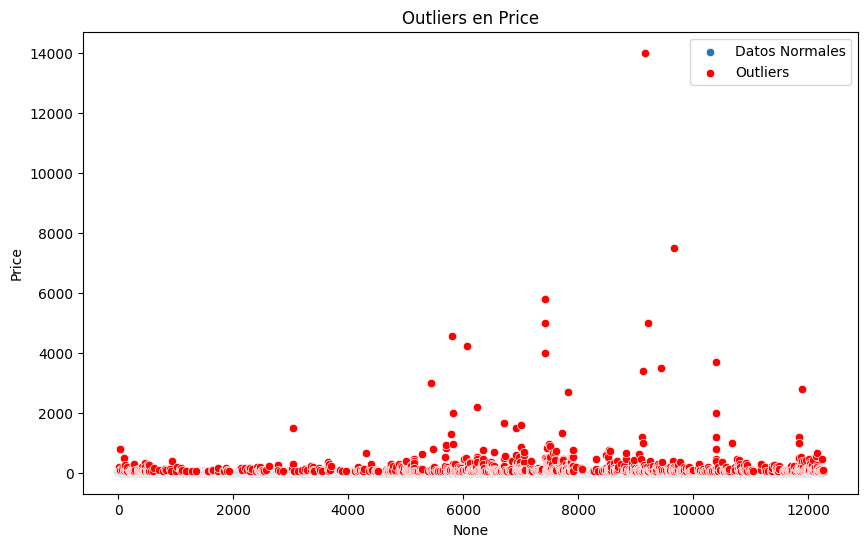

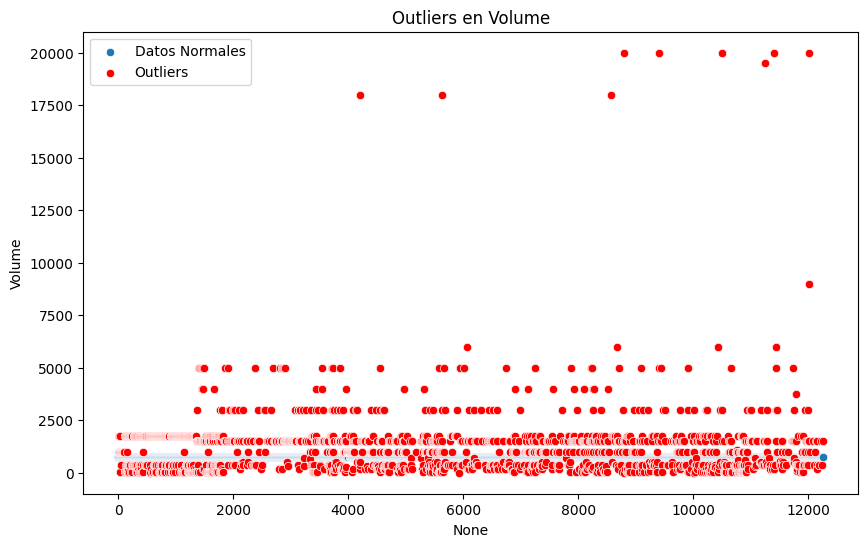

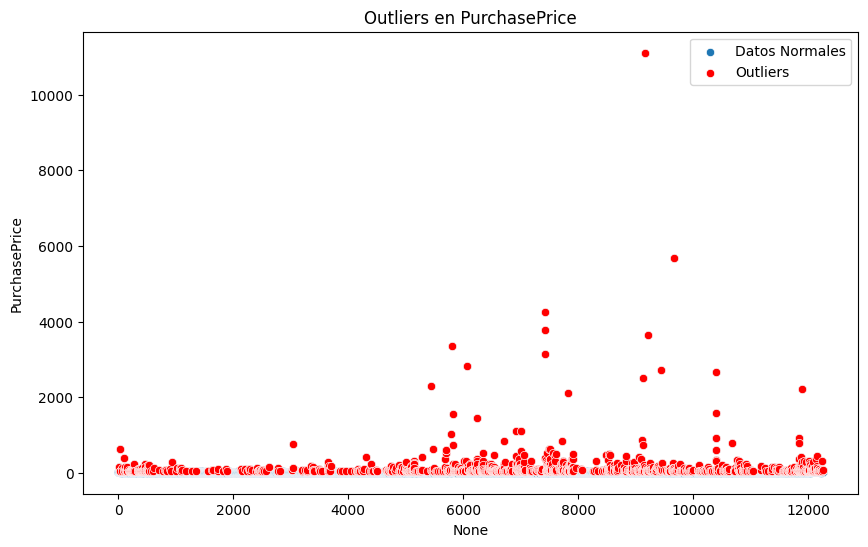

In [18]:
# Gráfico para mostrar outliers junto con datos normales
for columna in columnas_a_verificar:
    plt.figure(figsize=(10,6))
    
    # Graficar los puntos de la columna
    sns.scatterplot(x=df_2017PPD.index, y=df_2017PPD[columna], label='Datos Normales')

    # Graficar los puntos de los outliers
    outliers = detectar_outliers(df_2017PPD, columna)
    sns.scatterplot(x=outliers.index, y=outliers[columna], color='red', label='Outliers')
    
    plt.title(f'Outliers en {columna}')
    plt.legend()
    plt.show()


In [19]:
# Verificación del tipo de dato de cada columna
print(df_2017PPD.dtypes)

Brand               int64
Description        object
Price             float64
Size               object
Volume            float64
Classification      int64
PurchasePrice     float64
VendorNumber        int64
VendorName         object
dtype: object


#### Mantener los outliers: Todos los valores atípicos son importantes o representan casos especiales (como compras inusuales u otro tipo de volumen en Ml), se pueden mantener y analizar su impacto.

In [20]:
# Verificar si hay filas duplicadas
duplicated_rows = df_2017PPD.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Mostrar el número de filas duplicadas
print(f'Número de filas duplicadas en df_2017PPD: {num_duplicated_rows}')

# Opcional: Mostrar las filas duplicadas
if num_duplicated_rows > 0:
    print("Filas duplicadas en df_2017PPD es:")
    print(df_2017PPD[duplicated_rows])

Número de filas duplicadas en df_2017PPD: 0


In [21]:
null_values_date = df_2017PPD.isnull().sum()[df_2017PPD.isnull().sum() > 0]
print(null_values_date)
print(np.shape(df_2017PPD))

Series([], dtype: int64)
(12260, 9)


In [22]:
null_values_date

Series([], dtype: int64)

In [23]:
# Verificar si hay valores negativos en las columnas numéricas
negatives = df_2017PPD.select_dtypes(include=['number']) < 0

# Obtener los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtrar las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Mostrar los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(df_2017PPD[df_2017PPD[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")

No hay valores negativos en el DataFrame.


In [24]:
#Se hace un analsis de las distintas columnas 

for i in df_2017PPD.columns:
    print(i)
    print(df_2017PPD[i].describe()) #descripcion basica 
    print('--------------------------------------')

Brand
count    12260.000000
mean     17990.191680
std      12528.395592
min         58.000000
25%       5991.500000
50%      18789.000000
75%      25117.250000
max      90631.000000
Name: Brand, dtype: float64
--------------------------------------
Description
count                    12260
unique                   11114
top       Bacardi Superior Rum
freq                         7
Name: Description, dtype: object
--------------------------------------
Price
count    12260.000000
mean        38.643392
std        206.159284
min          0.000000
25%         10.990000
50%         15.990000
75%         29.990000
max      13999.900000
Name: Price, dtype: float64
--------------------------------------
Size
count     12260
unique       56
top       750mL
freq       9823
Name: Size, dtype: object
--------------------------------------
Volume
count    12260.000000
mean       842.646452
std        679.589292
min          0.000000
25%        750.000000
50%        750.000000
75%        750.000000

In [25]:
# Se analizan las columnas con tipo de datos flotantes y enteros

# Columnas de interés
columns_of_interest = ['Brand', 'Price','Classification', 'Volume', 'PurchasePrice', 'VendorNumber']

# Función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores (incluyendo nulos): {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente (freq): {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")


# Iterar sobre las columnas de interés y mostrar las estadísticas
for column in columns_of_interest:
    print_column_stats(df_2017PPD, column)


Estadísticas para la columna 'Brand':
Número total de valores (incluyendo nulos): 12260
Número total de valores: 12260.0
Número de valores únicos: 12260
Valor más frecuente (top): 58
Frecuencia del valor más frecuente (freq): 1
Valor mínimo: 58.0
Valor máximo: 90631.0
Media: 17990.19168026101

Estadísticas para la columna 'Price':
Número total de valores (incluyendo nulos): 12260
Número total de valores: 12260.0
Número de valores únicos: 380
Valor más frecuente (top): 9.99
Frecuencia del valor más frecuente (freq): 703
Valor mínimo: 0.0
Valor máximo: 13999.9
Media: 38.643391517128876

Estadísticas para la columna 'Classification':
Número total de valores (incluyendo nulos): 12260
Número total de valores: 12260.0
Número de valores únicos: 2
Valor más frecuente (top): 2
Frecuencia del valor más frecuente (freq): 8693
Valor mínimo: 1.0
Valor máximo: 2.0
Media: 1.7090538336052201

Estadísticas para la columna 'Volume':
Número total de valores (incluyendo nulos): 12260
Número total de valo

##### El análisis de las seis columnas seleccionadas proporciona una visión clara de las características principales de los productos y transacciones en el dataset. La columna 'Brand' contiene 12,260 valores únicos, lo que indica una diversidad significativa en las marcas, con un valor mínimo de 58 y un máximo de 90,631. Esto sugiere que las marcas están representadas por un amplio rango de identificadores numéricos, con una media de 17,990. En contraste, la columna 'Price' muestra una mayor concentración en los precios de los productos, con 380 valores únicos y un precio más frecuente de $9.99, encontrado 703 veces. Aunque el valor mínimo de precio es 0, el valor máximo asciende a $13,999.9, con una media de $38.64, lo que revela una variabilidad significativa en el costo de los productos.

##### La columna 'Classification' destaca una clara distinción entre dos tipos de clasificación, con el valor más frecuente siendo 2, presente en 8,693 registros, lo que representa la mayoría de las clasificaciones de los productos. En cuanto a 'Volume', la mayoría de los productos tienen un volumen de 750 ml (con una frecuencia de 9,840), pero existen algunas variaciones, con un volumen máximo de 20,000 ml y una media de 842.6 ml. Esto sugiere que el dataset está dominado por productos de tamaño estándar, con algunas excepciones.

##### Por otro lado, la columna 'PurchasePrice' presenta 2,314 valores únicos, con un precio de compra más frecuente de $6.53. Los precios de compra varían significativamente, desde 0 hasta $11,111.03, con una media de $26.49, lo que sugiere que los productos tienen diferentes niveles de costos asociados. Finalmente, la columna 'VendorNumber' revela que hay 131 vendedores únicos, con el vendedor más frecuente siendo identificado como 4425, presente en 1,639 transacciones. El valor de 'VendorNumber' varía desde 2 hasta 173,357, con una media de 10,815, lo que indica una amplia distribución en los números de identificación de los proveedores, aunque algunos proveedores dominan las transacciones.

In [28]:
df_2017PPD.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [29]:
# Cambio de idioma a espanol y de nombre a las columnas
# Diccionario que mapea los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'Brand': 'ProductoID',
    'Description': 'Descripcion',
    'Price': 'Precio_venta',
    'Size': 'Presentacion',
    'Volume': 'Volumen',
    'Classification': 'Clasificacion',
    'PurchasePrice': 'Precio_compra',
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Proveedor',
}

# Renombrar las columnas
df_2017PPD.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_2017PPD.head())

   ProductoID                  Descripcion  Precio_venta Presentacion  \
0          58  Gekkeikan Black & Gold Sake         12.99        750mL   
1          62     Herradura Silver Tequila         36.99        750mL   
2          63   Herradura Reposado Tequila         38.99        750mL   
3          72         No. 3 London Dry Gin         34.99        750mL   
4          75    Three Olives Tomato Vodka         14.99        750mL   

   Volumen  Clasificacion  Precio_compra  ProveedorID  \
0    750.0              1           9.28         8320   
1    750.0              1          28.67         1128   
2    750.0              1          30.46         1128   
3    750.0              1          26.11         9165   
4    750.0              1          10.94         7245   

                     Proveedor  
0  SHAW ROSS INT L IMP LTD      
1  BROWN-FORMAN CORP            
2  BROWN-FORMAN CORP            
3  ULTRA BEVERAGE COMPANY LLP   
4  PROXIMO SPIRITS INC.         


##### Este Paso tiene como objetivo crear un nuevo archivo de datos llamado Producto_proveedor que combina información clave sobre productos y proveedores del dataset 2017purchasepricesdec. En este caso, el nuevo archivo incluirá las columnas ProductoID, ProveedorID, Precio_compra, y Precio_venta, además de una nueva columna Producto_proveedorID que sirve como un identificador único para cada combinación de producto y proveedor.

In [31]:
#Crear un nuevo archivo de Producto_proveedor
# Seleccionar las columnas deseadas
columnas_seleccionadas = df_2017PPD[['ProductoID', 'ProveedorID', 'Precio_compra', 'Precio_venta']].copy()

# Agregar la columna ProductoProveedorId con valores autonumerados que empiezan en 1
columnas_seleccionadas['Producto_proveedorID'] = range(1, len(columnas_seleccionadas) + 1)

# Reordenar las columnas para que ProductoProveedorId sea la primera columna
columnas_seleccionadas = columnas_seleccionadas[['Producto_proveedorID', 'ProductoID', 'ProveedorID', 'Precio_compra', 'Precio_venta']]

# Guardar el nuevo dataframe en un archivo CSV
ruta_nuevo_archivo = 'C:/Users/danip/Desktop/AMC-Drinks/Analisis_Inventario_Distribuidora_Licores_AMCDrinks/EDA/Dataset/PRODUCTO_PROVEEDOR.csv'
columnas_seleccionadas.to_csv(ruta_nuevo_archivo, index=False)

In [32]:
# Agrupar por ProveedorID y contar los Proveedor únicos
proveedor_counts = df_2017PPD.groupby('ProveedorID')['Proveedor'].nunique()

# Filtrar los ProveedorID que tienen más de un Proveedor
proveedores_multiples = proveedor_counts[proveedor_counts > 1]

# Mostrar los ProveedorID que tienen más de un Proveedor
print(proveedores_multiples.index.tolist())

[1587, 1703, 2000, 4425]


In [33]:
# Seleccionar las columnas 'ProveedorID' y 'Proveedor'
df_proveedores = df_2017PPD[['ProveedorID', 'Proveedor']]

# Eliminar filas duplicadas para asegurarse de que cada proveedor sea único
df_proveedores = df_proveedores.drop_duplicates()

# Guardar el resultado en un nuevo archivo CSV llamado 'Proveedor.csv'
df_proveedores.to_csv('C:/Users/danip/Desktop/AMC-Drinks/Analisis_Inventario_Distribuidora_Licores_AMCDrinks/EDA/Dataset/PROVEEDOR.csv', index=False)

# Mostrar el DataFrame resultante para verificar
print(df_proveedores.head())

   ProveedorID                    Proveedor
0         8320  SHAW ROSS INT L IMP LTD    
1         1128  BROWN-FORMAN CORP          
3         9165  ULTRA BEVERAGE COMPANY LLP 
4         7245  PROXIMO SPIRITS INC.       
7         8112  MOET HENNESSY USA INC      


In [34]:
#Se crea la tabla PRODUCTO_FINAL

# Seleccionar las columnas deseadas
df_2017PPD_final = df_2017PPD[['ProductoID', 'Descripcion', 'Presentacion', 'Volumen', 'Clasificacion']]

# Guardar el nuevo dataframe en un archivo CSV
ruta_nuevo_archivo = 'C:/Users/danip/Desktop/AMC-Drinks/Analisis_Inventario_Distribuidora_Licores_AMCDrinks/EDA/Dataset/PRODUCTO_FINAL.csv'
df_2017PPD_final.to_csv(ruta_nuevo_archivo, index=False)

In [35]:
df_2017PPD_final.head()

,ProductoID,Descripcion,Presentacion,Volumen,Clasificacion
0,58,Gekkeikan Black & Gold Sake,750mL,750.0,1
1,62,Herradura Silver Tequila,750mL,750.0,1
2,63,Herradura Reposado Tequila,750mL,750.0,1
3,72,No. 3 London Dry Gin,750mL,750.0,1
4,75,Three Olives Tomato Vodka,750mL,750.0,1
